<a href="https://colab.research.google.com/github/a0pro0b/Improved-pure-pixel-identification-algorithms-to-determine-the-endmembers-in-hyperspectral-images/blob/main/Hyperspectral_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scipy

In [ ]:
!pip install spectral

     |████████████████████████████████| 212 kB 5.2 MB/s 


In [ ]:
import numpy as np
import matplotlib as mp
import spectral.io.envi as envi
import spectral.io.aviris as aviris

In [ ]:
img = aviris.open('/content/drive/MyDrive/Projects/RFL/f970619t01p02_r02_sc01.a.rfl','/content/drive/MyDrive/Projects/HSI Dataset/f970619t01p02_r02.a.spc')


In [ ]:
arr = img.load()

In [ ]:
arr.__class__

spectral.image.ImageArray

In [ ]:
print(arr.info())

	# Rows:            512
	# Samples:         614
	# Bands:           224
	Data format:   float32


In [ ]:
arr.shape

(512, 614, 224)

In [ ]:
import spectral.graphics.spypylab



In [ ]:
!pip install ipython


In [ ]:
from spectral import *

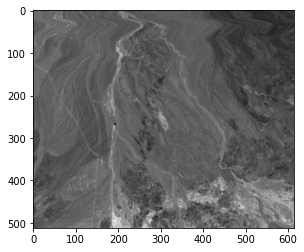

In [ ]:
view = imshow(img, (100,101,102))

In [ ]:
print(view)

ImageView object:
  Display bands       :  (100, 101, 102)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0927, 0.649]
    G: [0.0921, 0.6522]
    B: [0.0917, 0.649]



In [ ]:
arr

ImageArray([[[ 0.      0.      1.0367 ...  0.188   0.2414  0.2516]
             [ 0.      0.      1.0367 ...  0.1335  0.1662  0.1324]
             [ 0.      0.      1.0369 ...  0.1854  0.1793  0.1632]
             ...
             [ 0.      0.      0.9876 ...  0.1175  0.0937  0.0411]
             [ 0.      0.      1.     ...  0.1221  0.1649  0.1714]
             [ 0.      0.      0.9874 ...  0.1404  0.13    0.1503]]

            [[ 0.      0.      0.0086 ...  0.2152  0.1631  0.1936]
             [ 0.      0.      0.0086 ...  0.2862  0.219   0.2757]
             [ 0.      0.      0.0086 ...  0.1325  0.1649  0.1101]
             ...
             [ 0.      0.     -0.005  ...  0.0931  0.0777  0.0428]
             [ 0.      0.     -0.005  ...  0.0684  0.0597  0.0963]
             [ 0.      0.     -0.005  ...  0.1942  0.1465  0.1762]]

            [[ 0.      0.     -0.005  ...  0.1634  0.1639  0.1094]
             [ 0.      0.     -0.005  ...  0.1828  0.1984  0.2242]
             [ 0.      0

In [ ]:
arr[10,10,100]

0.3271

In [ ]:
arr[10,10,100:150]

ImageArray([[[ 0.3271  0.3282  0.3265  0.3229  0.3256  0.3228  0.3375
               0.      0.      0.      0.      0.6724 -0.005   0.2884
               0.3006  0.2955  0.3011  0.3056  0.3082  0.3111  0.3199
               0.3215  0.3225  0.3262  0.3269  0.3308  0.3309  0.3338
               0.3331  0.3349  0.3368  0.3367  0.34    0.3395  0.3398
               0.3437  0.3424  0.3425  0.3437  0.3425  0.345   0.3438
               0.3439  0.3406  0.3431  0.3434  0.3435  0.339   0.3402
               0.3476]]], dtype=float32)

In [ ]:
arr[10,10,1:224]

ImageArray([[[ 0.     -0.0022  0.0783  0.0951  0.1007  0.1071  0.1095
               0.1189  0.1246  0.1298  0.1313  0.1351  0.1397  0.1441
               0.1504  0.1567  0.1637  0.1708  0.1786  0.1868  0.1938
               0.1993  0.2049  0.2097  0.2121  0.216   0.2187  0.2197
               0.2234  0.2273  0.2306  0.2249  0.2269  0.2297  0.2335
               0.2353  0.2387  0.2417  0.246   0.2487  0.2484  0.2516
               0.2537  0.2548  0.2575  0.2559  0.2575  0.2569  0.2587
               0.2596  0.2593  0.2594  0.2596  0.2609  0.2614  0.2623
               0.261   0.2616  0.2626  0.2651  0.2653  0.2663  0.2681
               0.2709  0.2733  0.274   0.2756  0.2764  0.2793  0.2812
               0.2828  0.2845  0.2857  0.2878  0.2898  0.2911  0.2929
               0.2935  0.2967  0.2936  0.2912  0.2965  0.3004  0.3023
               0.3038  0.3065  0.3075  0.309   0.3103  0.3112  0.3137
               0.3171  0.3173  0.3192  0.3201  0.3197  0.3239  0.3256
               0.326

In [ ]:
!pip install pysptools

     |████████████████████████████████| 8.1 MB 4.9 MB/s 
  Created wheel for pysptools: filename=pysptools-0.15.0-py3-none-any.whl size=8133751 sha256=b558e02640cc591624799d80af8836218d0f93de64e449a9d4bd9670f56331c6
  Stored in directory: /root/.cache/pip/wheels/ee/61/31/fb8bf9e1d7508efcfce674a9dc4ac98e67cfe875a5567c4e7e
Successfully built pysptools


In [ ]:
import pysptools.eea as eea

In [ ]:
b = np.reshape(arr,(314368,224))


In [ ]:
b


array([[ 0.    ,  0.    ,  1.0367, ...,  0.188 ,  0.2414,  0.2516],
       [ 0.    ,  0.    ,  1.0367, ...,  0.1335,  0.1662,  0.1324],
       [ 0.    ,  0.    ,  1.0369, ...,  0.1854,  0.1793,  0.1632],
       ...,
       [ 0.    ,  0.    , -0.005 , ...,  0.1052,  0.1165,  0.1056],
       [ 0.    ,  0.    , -0.005 , ...,  0.1561,  0.153 ,  0.1569],
       [ 0.    ,  0.    , -0.005 , ...,  0.1318,  0.1281,  0.1049]],
      dtype=float32)

In [ ]:
b.ndim

2

In [ ]:
b.size

70418432

In [ ]:
b.shape

(314368, 224)

In [ ]:
purepixels = eea.eea.PPI(b,10,10)

In [ ]:
print(type(purepixels))
print(type(arr))

<class 'tuple'>
<class 'spectral.image.ImageArray'>


In [ ]:
[purepixels,b]=eea.eea.PPI(b,10,10)

In [ ]:
b


array([304819, 314367, 104791, 104784, 104785, 104786, 104787, 104788,
       104789, 104790])

In [ ]:
purepixels.shape

(10, 224)

In [ ]:
import h5py, os, copy
import matplotlib.pyplot as plt
import numpy as np
import pysptools.util as util
import pysptools.eea as eea #endmembers extraction algorithms
import pysptools.abundance_maps as amap
import pysptools.classification as cls
import pysptools.material_count as cnt
%matplotlib inline

#for clean output, to not print warnings, don't use when developing script
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

import os
import PIL
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import matplotlib as mp
import spectral.io.envi as envi
import spectral.io.aviris as aviris

In [ ]:


#folder_path = "drive/MyDrive/image_test"
folder_path = "/content/drive/MyDrive/Projects/RFL"
images_path = os.listdir(folder_path)
aa=[]
aaa=[]
aaaa=[]
for n, image in enumerate(images_path):
  #ds = dicom.dcmread(os.path.join(folder_path, image))
  print(image)
  #print((os.path.join(folder_path, image))
  img = aviris.open((os.path.join(folder_path, image)),'/content/drive/MyDrive/Projects/HSI Dataset/f970619t01p02_r02.a.spc')
  arr = img.load()
  arr.__class__
  print(arr.info())
  arr.shape
  #np.set_printoptions(threshold=5, linewidth=120)
  np.set_printoptions(threshold=np.inf, linewidth=140)
  #aaa=arr
  #aa=np.reshape(arr,(314368,224))
  aa.append(arr.flatten()[0:10000])
  #purepixels = eea.eea.PPI((arr.flatten()),10,10)
  #aa = purepixels
  #aaa.append(ds.pixel_array)#this is for cnn
  #np.savez_compressed('/content/drive/MyDrive/Projects/Pixel Array Compressed/data'+str(n)+'.npz', aaa)
  #data = data - np.min(data)
  #data = data / np.max(data)
  #data = (data * 255).astype(np.uint8)


#numpy_aaa=np.array(aaa)#used later for cnn
print(len(aa))
print(len(aa[0]))
print(len(aa[1]))
print(len(aa[2]))
print(len(aa[3]))
#print(len(aa[4]))


f970619t01p02_r02_sc01.a.rfl
	# Rows:            512
	# Samples:         614
	# Bands:           224
	Data format:   float32
f970619t01p02_r02_sc02.a.rfl
	# Rows:            512
	# Samples:         614
	# Bands:           224
	Data format:   float32
f970619t01p02_r02_sc03.a.rfl
	# Rows:            512
	# Samples:         614
	# Bands:           224
	Data format:   float32
f970619t01p02_r02_sc04.a.rfl
	# Rows:            512
	# Samples:         614
	# Bands:           224
	Data format:   float32
4
10000
10000
10000
10000


In [ ]:
print(type(aa))

<class 'list'>


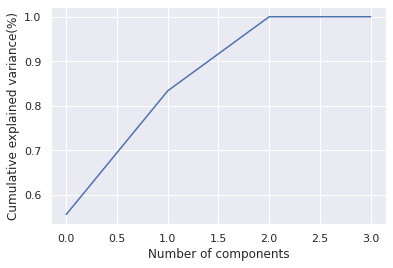

ValueError: ignored

In [ ]:
pca = PCA().fit(aa)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.header
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance(%)')
plt.show()

#aa = StandardScaler().fit_transform(aa)
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(aa)
pca = PCA(n_components =10)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)
df = pd.DataFrame(reduced)
print("\n",df)
print("\nShape of PCA Matrix ", df.shape)